In [1]:
import yfinance as yf

In [2]:
tiker_symbol = "SCB.BK"
start_date = "2023-01-01"
end_date = "2025-9-2"

data = yf.download(tiker_symbol, start=start_date, end=end_date)
print(data)

C:\Users\petch\AppData\Local\Temp\ipykernel_14452\3239527317.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tiker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker          SCB.BK      SCB.BK      SCB.BK      SCB.BK    SCB.BK
Date                                                                
2023-01-03   83.413818   83.803603   82.634250   83.413818   7836900
2023-01-04   84.972961   84.972961   83.803609   83.803609  10532600
2023-01-05   86.142311   86.921880   85.362743   85.752527  24297900
2023-01-06   88.091232   88.091232   85.752527   86.142311  14407200
2023-01-09   88.870804   88.870804   87.701451   88.481020  11904400
...                ...         ...         ...         ...       ...
2025-08-26  125.031006  126.999998  125.031006  126.507750  15185000
2025-08-27  125.523254  126.507751  125.031006  125.523254   6553800
2025-08-28  126.015503  126.999999  126.015503  126.015503   5963900
2025-08-29  126.507751  127.492248  126.015503  126.507751  12954700
2025-09-01  127.000000  127.492248  126.507752  127.000000   6902700

[646 rows x 5 columns]


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.DataFrame(data)
print(df.dtypes)

Price   Ticker
Close   SCB.BK    float64
High    SCB.BK    float64
Low     SCB.BK    float64
Open    SCB.BK    float64
Volume  SCB.BK      int64
dtype: object


In [23]:
df = df.astype(float)
print(df)

Price            Close        High         Low        Open      Volume
Ticker          SCB.BK      SCB.BK      SCB.BK      SCB.BK      SCB.BK
Date                                                                  
2023-01-03   83.413818   83.803603   82.634250   83.413818   7836900.0
2023-01-04   84.972961   84.972961   83.803609   83.803609  10532600.0
2023-01-05   86.142311   86.921880   85.362743   85.752527  24297900.0
2023-01-06   88.091232   88.091232   85.752527   86.142311  14407200.0
2023-01-09   88.870804   88.870804   87.701451   88.481020  11904400.0
...                ...         ...         ...         ...         ...
2025-08-26  125.031006  126.999998  125.031006  126.507750  15185000.0
2025-08-27  125.523254  126.507751  125.031006  125.523254   6553800.0
2025-08-28  126.015503  126.999999  126.015503  126.015503   5963900.0
2025-08-29  126.507751  127.492248  126.015503  126.507751  12954700.0
2025-09-01  127.000000  127.492248  126.507752  127.000000   6902700.0

[646 

In [24]:
dfClose = pd.DataFrame(df, columns=['Close']) 
print(dfClose)

            Close
Date             
2023-01-03    NaN
2023-01-04    NaN
2023-01-05    NaN
2023-01-06    NaN
2023-01-09    NaN
...           ...
2025-08-26    NaN
2025-08-27    NaN
2025-08-28    NaN
2025-08-29    NaN
2025-09-01    NaN

[646 rows x 1 columns]


In [29]:
close_values = df[('Close', 'SCB.BK')].values
def moving_avg(close_values, window_size):
    result = []
    moving_sum = sum(close_values[:window_size])
    result.append(moving_sum / window_size)
    for i in range(len(close_values)-window_size):
        moving_sum += close_values[i + window_size] - close_values[i]
        result.append(moving_sum / window_size)
    return result

In [31]:
print(moving_avg(close_values, 15))

[86.37618255615234, 86.37618255615234, 86.24625447591146, 86.09034118652343, 85.85647125244141, 85.51865844726562, 85.02493235270182, 84.6611338297526, 84.29733479817709, 83.959521484375, 83.5437520345052, 83.179953511556, 82.79016977945963, 82.40038604736328, 81.98461507161458, 81.67278798421223, 81.33497467041016, 80.98416849772136, 80.56839853922526, 80.08766377766928, 79.72386423746745, 79.54196370442709, 79.24312896728516, 78.97027994791667, 78.7883804321289, 78.76239420572917, 78.7883804321289, 78.86633758544922, 78.86633758544922, 79.07422281901042, 79.28210754394532, 79.46400807698568, 79.6848866780599, 79.84080047607422, 79.86678619384766, 79.71087341308593, 79.73685963948567, 79.74985249837239, 79.84080200195312, 79.78883056640625, 79.71087341308593, 79.58094431559245, 79.4770009358724, 79.42503000895182, 79.2691162109375, 79.13918863932291, 79.11320241292317, 79.03524525960286, 79.03524525960286, 79.23013763427734, 79.54196472167969, 79.64590708414714, 79.8278065999349, 79.9

In [32]:
volues = df[('Volume', 'SCB.BK')].values
def moving_avg(volues, window_size):
    result = []
    moving_sum = sum(volues[:window_size])
    result.append(moving_sum / window_size)
    for i in range(len(volues)-window_size):
        moving_sum += volues[i + window_size] - volues[i]
        result.append(moving_sum / window_size)
    return result

In [33]:
print(moving_avg(volues, 15))

[13839086.666666666, 13848606.666666666, 13554740.0, 12321986.666666666, 11871553.333333334, 11495060.0, 11833033.333333334, 11231120.0, 10929940.0, 9937906.666666666, 10034253.333333334, 9885453.333333334, 9685540.0, 9609733.333333334, 9446766.666666666, 9022720.0, 9255806.666666666, 9850226.666666666, 10052940.0, 10098380.0, 10552140.0, 11130086.666666666, 11281420.0, 11719866.666666666, 12282873.333333334, 13700940.0, 14464153.333333334, 14857166.666666666, 15267813.333333334, 13806966.666666666, 13649253.333333334, 13582926.666666666, 13037786.666666666, 13423206.666666666, 14582833.333333334, 16490486.666666666, 15806880.0, 17175013.333333332, 17700653.333333332, 18085293.333333332, 16794540.0, 16098540.0, 15954446.666666666, 15728053.333333334, 15988640.0, 16400700.0, 16681013.333333334, 17246660.0, 16727333.333333334, 15376813.333333334, 12950060.0, 12187286.666666666, 10843486.666666666, 10108413.333333334, 9982546.666666666, 10699146.666666666, 11314966.666666666, 11072320.0, 

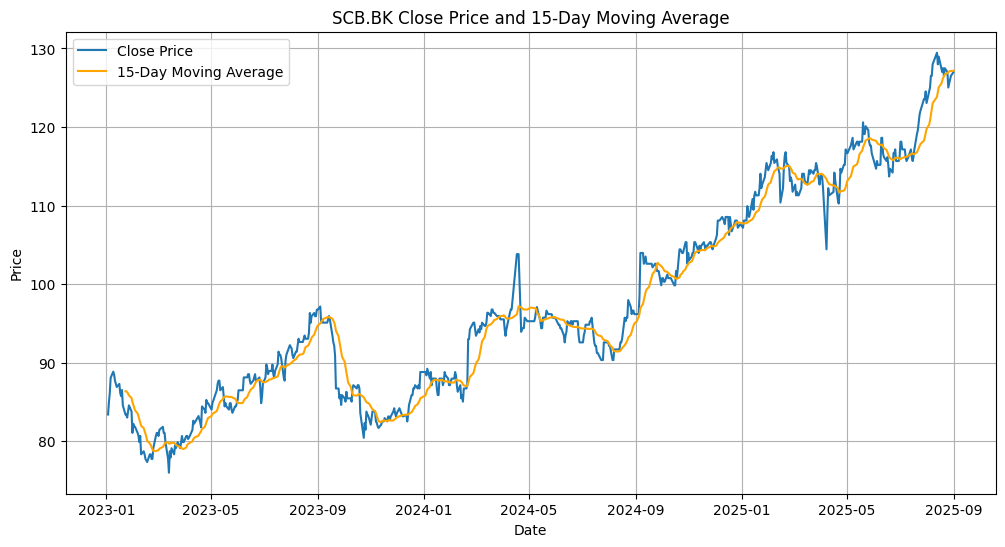

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index[14:], moving_avg(close_values, 15), label='15-Day Moving Average', color='orange')
plt.title('SCB.BK Close Price and 15-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


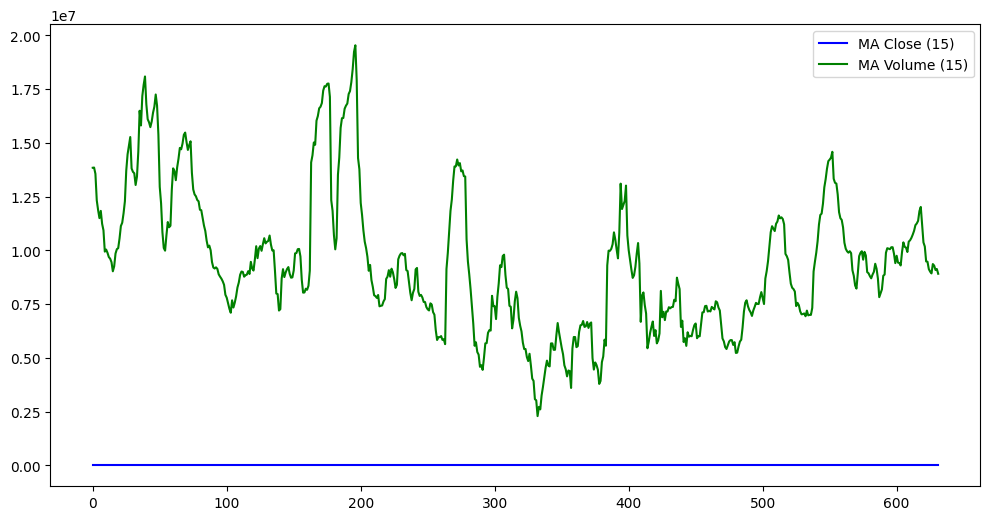

In [47]:
import matplotlib.pyplot as plt

# Moving Average ของ Close
ma_close = moving_avg(close_values, 15)

# Moving Average ของ Volume
ma_volume = moving_avg(volues, 15)

plt.figure(figsize=(12, 6))

# Plot ราคาปิด
plt.plot(ma_close, label="MA Close (15)", color="blue")

# Plot ปริมาณการซื้อขาย
plt.plot(ma_volume, label="MA Volume (15)", color="green")

plt.legend()
plt.show()
